In [1]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Simple Linear Regression using `sklearn` 
We begin by loading up the `mtcars` dataset. This data was extracted from the 1974 Motor Trend US magazine, and comprises of fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models). We will load this data to a dataframe with 32 observations on 11 (numeric) variables. Here is an explanation of the features:

- `mpg` is Miles/(US) gallon 
- `cyl` is Number of cylinders, 
- `disp` is	Displacement (cu.in.), 
- `hp` is	Gross horsepower, 
- `drat` is	Rear axle ratio, 
- `wt` is the Weight (1000 lbs), 
- `qsec` is 1/4 mile time,
- `vs` is Engine (0 = V-shaped, 1 = straight), 
- `am` is Transmission (0 = automatic, 1 = manual), 
- `gear` is the Number of forward gears, 
- `carb` is	Number of carburetors.

In [2]:
import pandas as pd

dfcars = pd.read_csv("./data/mtcars.csv")
dfcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
# Fix the column title 
dfcars = dfcars.rename(columns={"Unnamed: 0":"car name"})
dfcars.head()

,car name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
dfcars.shape

(32, 12)

In [5]:
# split into training set and testing set
from sklearn.model_selection import train_test_split

#set random_state to get the same split every time
traindf, testdf = train_test_split(dfcars, test_size=0.2, random_state=42)

In [6]:
# testing set is around 20% of the total data; training set is around 80%
print("Shape of full dataset is: {}".format(dfcars.shape))
print("Shape of training dataset is: {}".format(traindf.shape))
print("Shape of test dataset is: {0}".format(testdf.shape))

Shape of full dataset is: (32, 12)
Shape of training dataset is: (25, 12)
Shape of test dataset is: (7, 12)


In [7]:
traindf.head()

,car name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
12,Merc 450SL,17.3,8,275.8,180,3.07,3.730,17.60,0,0,3,3
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
16,Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4


We will now use `sklearn` to predict automobile mileage per gallon (mpg) and evaluate these predictions. We already loaded the data and split them into a training set and a test set.

In [8]:
#sns.pairplot(traindf)

Text(0, 0.5, 'Car MPG')

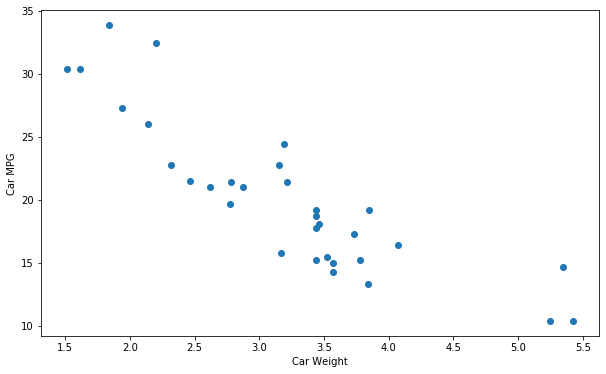

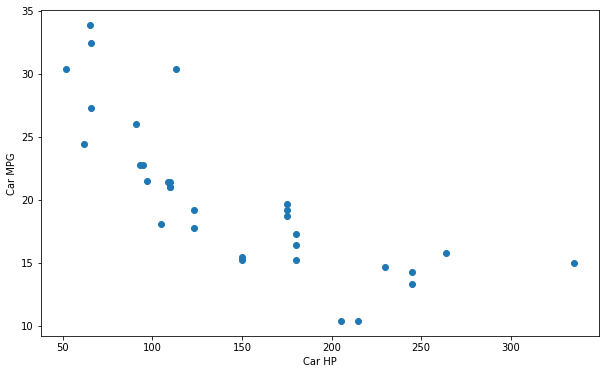

In [9]:
y_mpg = dfcars.mpg
x_wt = dfcars.wt
x_hp = dfcars.hp

fig_wt, ax_wt = plt.subplots(1,1, figsize=(10,6))
ax_wt.scatter(x_wt, y_mpg)
ax_wt.set_xlabel(r'Car Weight')
ax_wt.set_ylabel(r'Car MPG')

fig_hp, ax_hp = plt.subplots(1,1, figsize=(10,6))
ax_hp.scatter(x_hp, y_mpg)
ax_hp.set_xlabel(r'Car HP')
ax_hp.set_ylabel(r'Car MPG')

We select the `wt` column as the predictor

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [11]:
X_train = np.array(traindf.wt)
y_train = np.array(traindf.mpg)
X_train = X_train.reshape(X_train.shape[0], 1)

In [12]:
X_test = np.array(testdf.wt)
y_test = np.array(testdf.mpg)
X_test = X_test.reshape(X_test.shape[0], 1)

In [13]:
#create linear model
regression = LinearRegression()

#fit linear model
regression.fit(X_train, y_train)

predicted_y = regression.predict(X_test)

r2 = regression.score(X_test, y_test)
print(f'R^2 = {r2:.5}')

R^2 = 0.68798


In [14]:
print('Regression Score:', regression.score(X_train, y_train))
print('Test MSE:', mean_squared_error(predicted_y, y_test))
print('Train MSE:', mean_squared_error(y_train, regression.predict(X_train)))

print('Coefficients: \n', regression.coef_[0], regression.intercept_)

Regression Score: 0.7701379909791617
Test MSE: 12.475985659918837
Train MSE: 7.773697766387512
Coefficients: 
 -5.336941400557081 36.93731031351841


Text(0.5, 0, 'Predicted MPG')

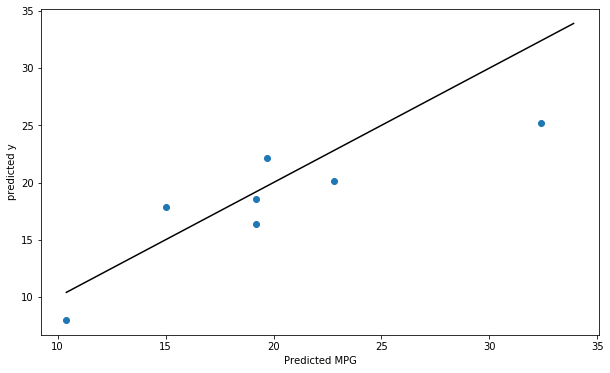

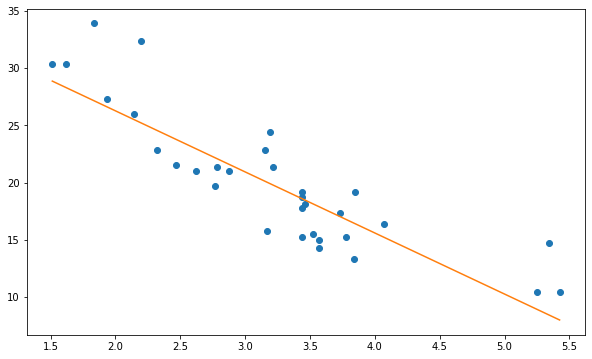

In [15]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(y_test, predicted_y, 'o')
grid = np.linspace(np.min(dfcars.mpg), np.max(dfcars.mpg), 100)
ax.plot(grid, grid, color="black") # 45 degree line
ax.set_xlabel("actual y")
ax.set_ylabel("predicted y")

fig1, ax1 = plt.subplots(1,1, figsize=(10,6))
ax1.plot(dfcars.wt, dfcars.mpg, 'o')
xgrid = np.linspace(np.min(dfcars.wt), np.max(dfcars.wt), 100)
ax1.plot(xgrid, regression.predict(xgrid.reshape(100, 1)))
ax.set_xlabel("Weight of the car")
ax.set_xlabel("Predicted MPG")

### KNN Regression using `sklearn`

In [16]:
from sklearn.neighbors import KNeighborsRegressor
k = 5
knnreg = KNeighborsRegressor(n_neighbors=k)

In [17]:
knnreg.fit(X_train, y_train)

# Evaluate the outcome on the train set using R^2
r2_train = knnreg.score(X_train, y_train)

# Print results
print(f'kNN model with {k} neighbors gives R^2 on the train set: {r2_train:.5}')

kNN model with 5 neighbors gives R^2 on the train set: 0.87181


In [18]:
y_pred = knnreg.predict(X_test)
y_pred

array([20.14, 14.  , 15.3 , 26.3 , 19.56, 17.06, 16.88])

In [21]:
# Evaluate the outcome on the test set 
r2_test = knnreg.score(X_test, y_test)
print('kNN model with {0} neighbors gives R^2 on the test set: {1:6.5}'.format(k, r2_test))

kNN model with 5 neighbors gives R^2 on the test set: 0.69922


Not so good? Lets vary the number of neighbors and see what we get

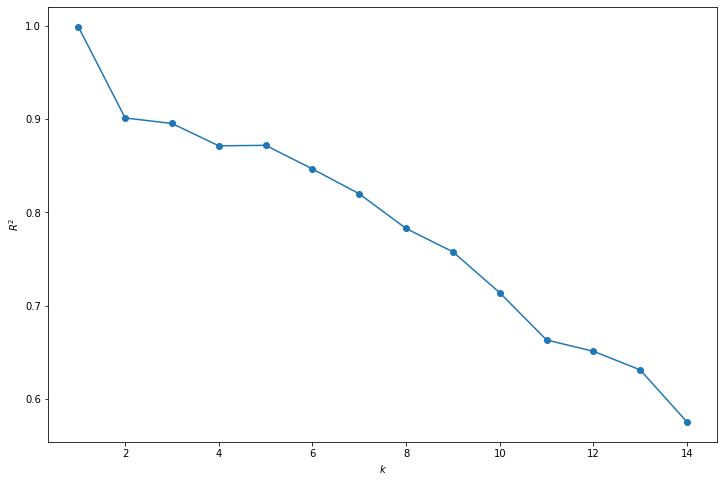

In [24]:
ks = range(1, 15) # Grid of k's
scores_train = [] # R2 scores
for k in ks:
    # Create KNN model
    knnreg = KNeighborsRegressor(n_neighbors=k) 
    
    # Fit the model to training data
    knnreg.fit(X_train, y_train) 
    
    # Calculate R^2 score
    score_train = knnreg.score(X_train, y_train) 
    scores_train.append(score_train)

# Plot
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.plot(ks, scores_train,'o-')
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$R^{2}$');

Lets look at the scores on the test set.

Text(0, 0.5, '$R^{2}$')

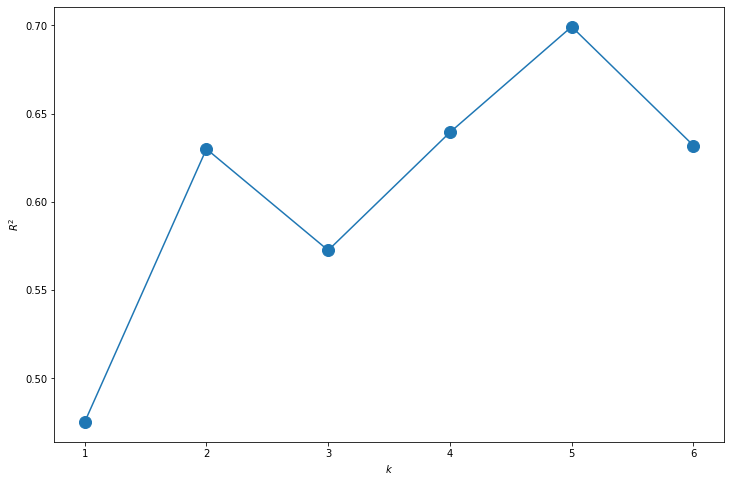

In [25]:
ks = range(1, 7) # Grid of k's
scores_test = [] # R2 scores
for k in ks:
    knnreg = KNeighborsRegressor(n_neighbors=k) # Create KNN model
    knnreg.fit(X_train, y_train) # Fit the model to training data
    score_test = knnreg.score(X_test, y_test) # Calculate R^2 score
    scores_test.append(score_test)

# Plot
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.plot(ks, scores_test,'o-', ms=12)
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$R^{2}$')


The graphs suggest that the best k is k=5 since it captures most of the training data(almost 90%) and also performs the best as compared to models with other k